# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~merge_df['Mouse ID'].isin(dup_mice_ID)]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

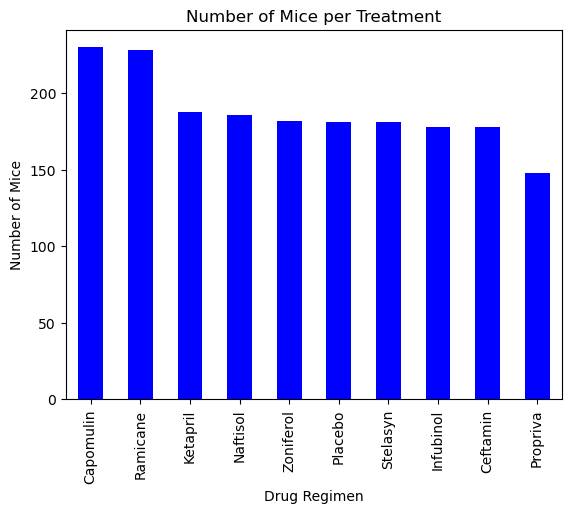

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import matplotlib.pyplot as plt
import numpy as np
mice_count = clean_df['Drug Regimen'].value_counts()

plot_pandas = mice_count.plot.bar(color='b')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

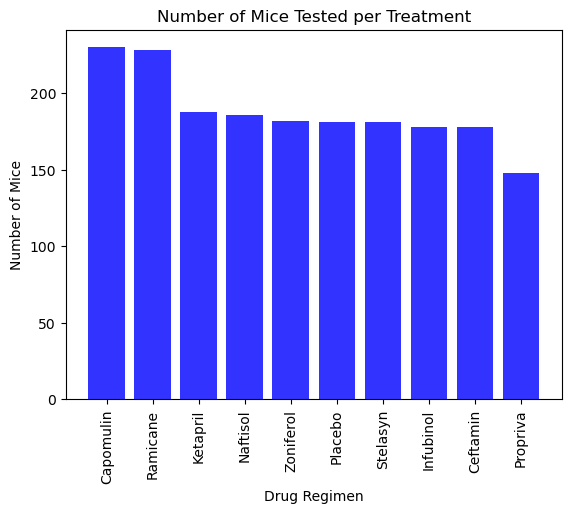

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import matplotlib.pyplot as plt
import numpy as np
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

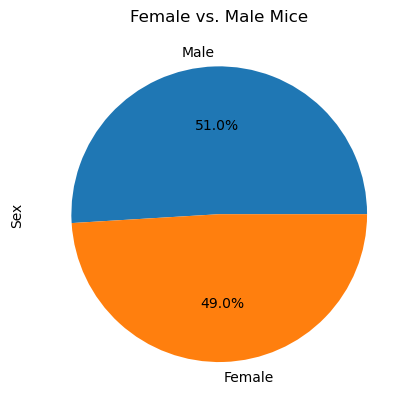

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


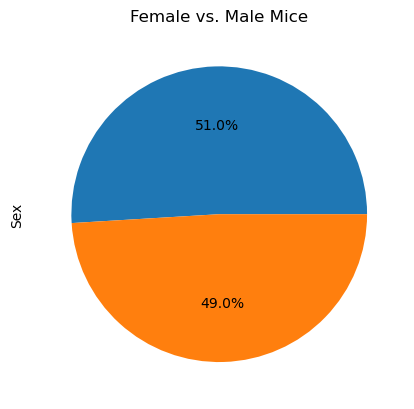

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_time = clean_df.groupby("Mouse ID").max()[["Timepoint"]].reset_index()
greatest_time
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Timepoint = pd.merge(greatest_time, clean_df, on=["Mouse ID", "Timepoint"], how="left")
Timepoint



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for T in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumors = Timepoint.loc[Timepoint["Drug Regimen"]==T, "Tumor Volume (mm3)"]


    # add subset 
    Tumor_vol.append(Tumors)
    
    # Determine outliers using upper and lower bounds
    q1 = Tumors.quantile(0.25)
    q3 = Tumors.quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    ub = q3+(1.5*IQR)
    outlier = Tumors[(Tumors<lb)|(Tumors>ub)]
    print(T, outlier)
    


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


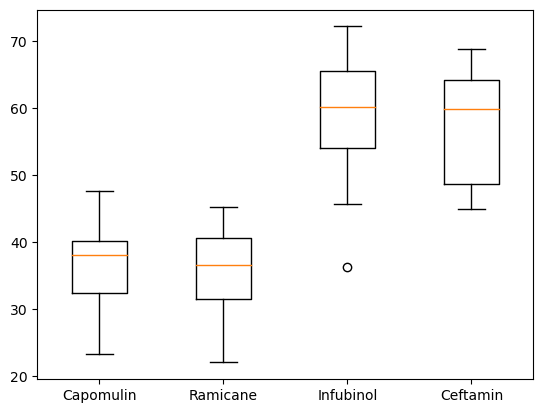

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Tumor_vol, labels=Treatments)
plt.show()


## Line and Scatter Plots

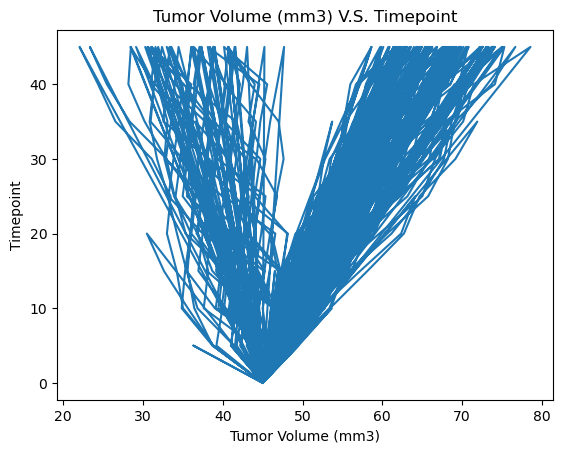

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
campo_df = merge_df[(merge_df["Drug Regimen"] == "Capomulin")]
campo_df

plt.plot(merge_df["Tumor Volume (mm3)"],
         merge_df["Timepoint"])
plt.title("Tumor Volume (mm3) V.S. Timepoint")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.show()

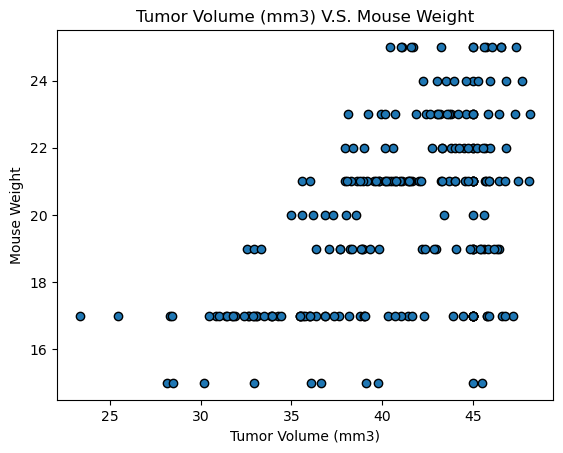

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(campo_df["Tumor Volume (mm3)"], 
            campo_df["Weight (g)"],
            edgecolor="black", marker="o", )


# Incorporate the other graph properties
plt.title("Tumor Volume (mm3) V.S. Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")
plt.show()

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show()


## Correlation and Regression

The r-value is: 0.5256995552077172
The r-value squared is: 0.27636002234559165


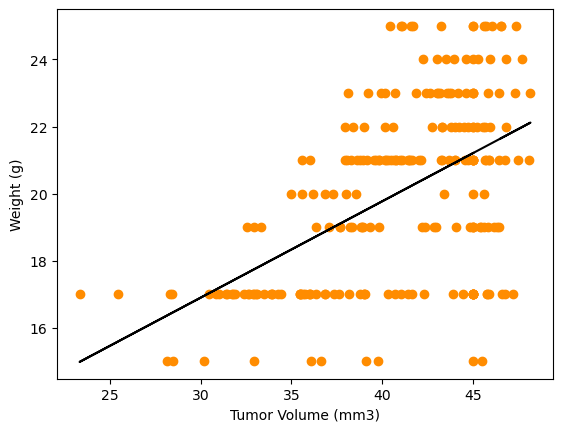

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Linear regression on Northern Hemisphere

x_series = campo_df["Tumor Volume (mm3)"]
y_series = campo_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()